**Instructions**

1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import expon
from scipy import stats
#from scipy.stats import boxcox

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

%matplotlib inline
pd.set_option('display.max_columns', None)

I use the output dataset from the 'lab-feature-extraction' which does not have any transformation (normalisation, scaling, log, etc.) applied yet.

In [2]:
data = pd.read_csv('customer_data.csv')

In [3]:
data = data.set_index('customer')
data.head()

,state,response,coverage,education,employment_status,location_code,policy,renew_offer_type,sales_channel,vehicle_class,effective_to_date,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor or College,Employed,Suburban,Corporate,Offer 1-2,Direct,Normal Car,2011-02-24,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,Arizona,No,Extended,Bachelor or College,Unemployed,Suburban,Personal,Offer 3-4,Direct,Normal Car,2011-01-31,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,Nevada,No,Premium,Bachelor or College,Employed,Suburban,Personal,Offer 1-2,Direct,Normal Car,2011-02-19,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,California,No,Basic,Bachelor or College,Unemployed,Suburban,Corporate,Offer 1-2,Indirect,Medium-Class Car,2011-01-20,7645.861827,0,106,18,65,0,7,529.881344
HB64268,Washington,No,Basic,Bachelor or College,Employed,Rural,Personal,Offer 1-2,Direct,Normal Car,2011-02-03,2813.692575,43836,73,12,44,0,1,138.130879


### 1. Get the numerical variables from our dataset.

In [4]:
nums = data.select_dtypes(include=[np.number])
nums.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [5]:
nums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 642.2+ KB


### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

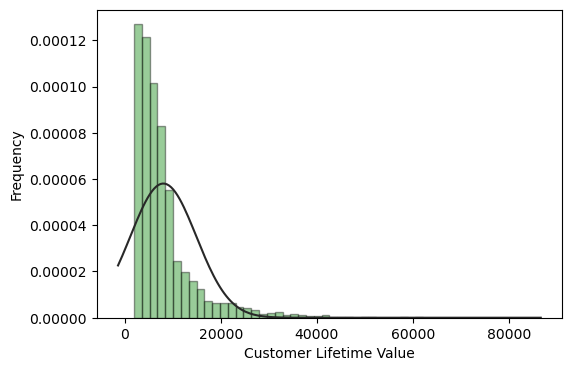

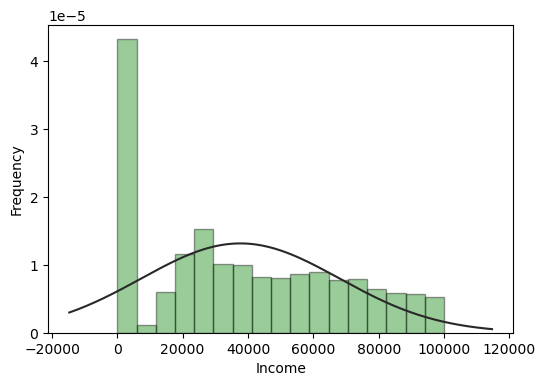

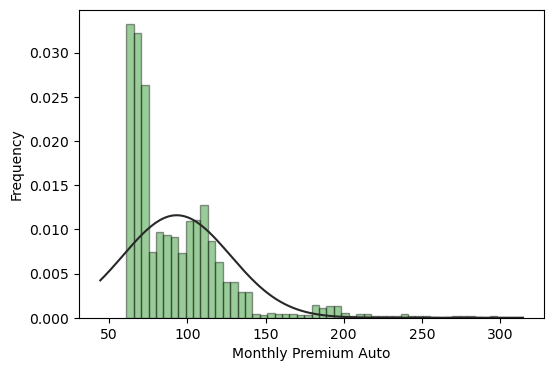

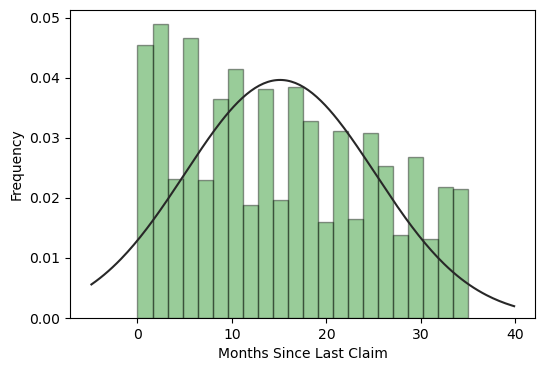

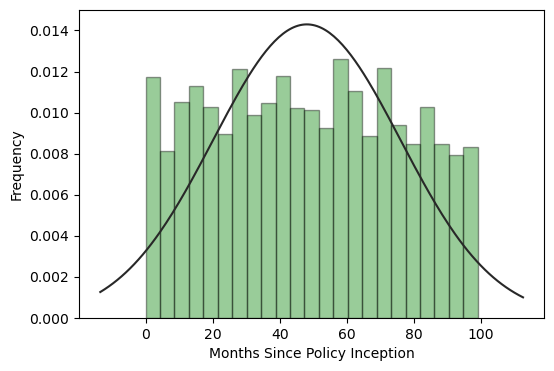

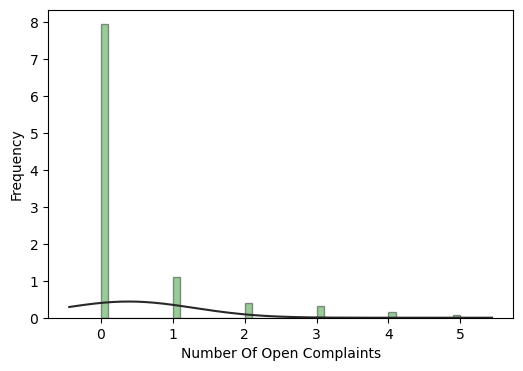

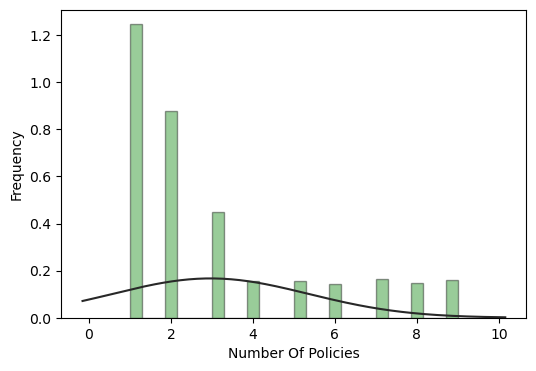

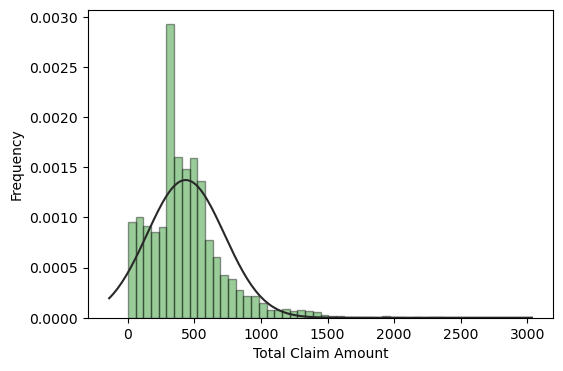

In [6]:
for column in nums:
    plt.figure(figsize = (6,4))
    sns.distplot(nums[column], fit=norm, color='green', hist_kws={'edgecolor': 'black'}, kde=False)

    # I modify the xlabel.
    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

Only a couple of the variables somewhat fit the theoretical normal distribution, even though none perfectly. Those two are 'months_since_policy_inception' and 'total_claim_amount'.

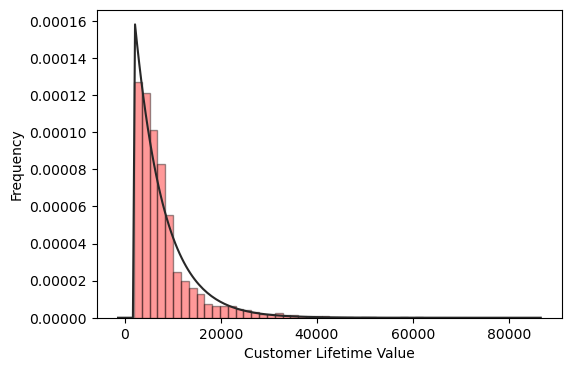

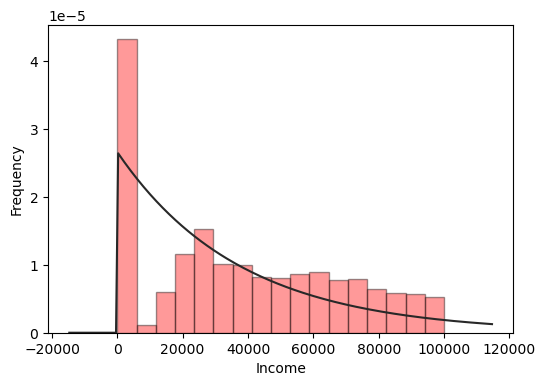

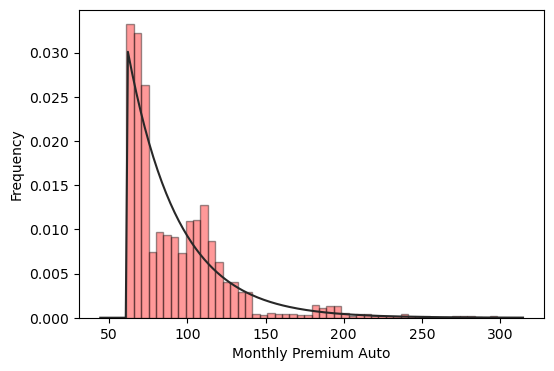

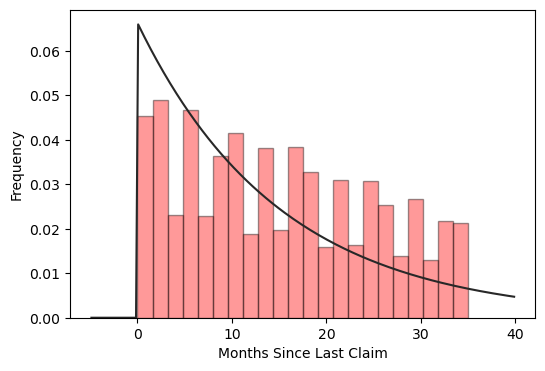

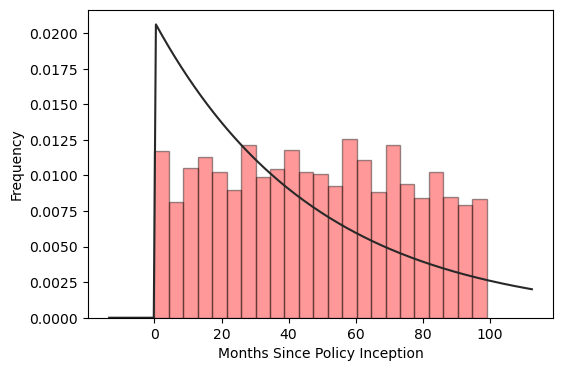

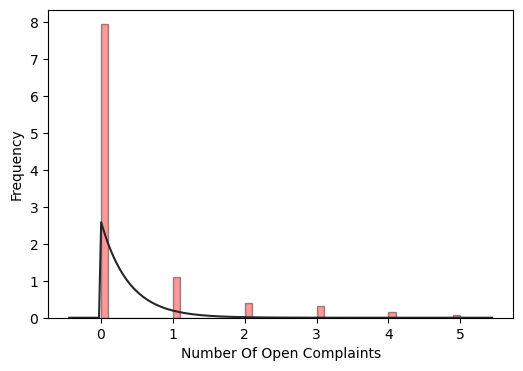

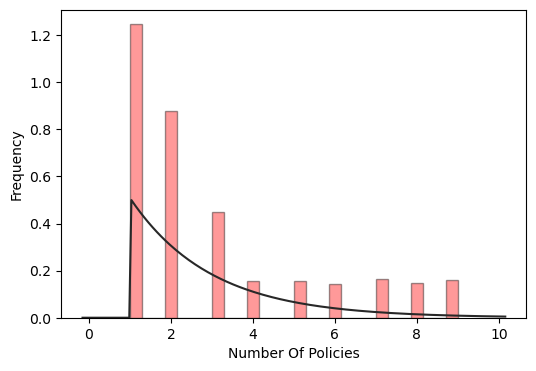

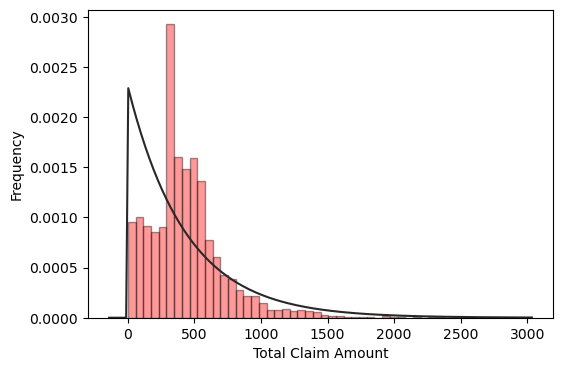

In [7]:
for column in nums:
    plt.figure(figsize=(6, 4))
    sns.distplot(nums[column], fit=expon, color='red', hist_kws={'edgecolor': 'black'}, kde=False)

    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

The majority of the remaining variables somewhat fit the theoretical exponential distribution, but most of them escape from it either on the lowest value or the upper end of the values. The theoretical exponential distribution is the perfect fit for 'customer_lifetime_value'.

### 3. Check if any of the transformations we have seen up to this point changes the result.

First I try with the StandardScaler since I had considered it the more adequate transformer over MinMaxScaler and Normalizer in the previous lab. 

In [8]:
transformer = StandardScaler().fit(nums)
transformed_nums = transformer.transform(nums)
standardized_cols = nums.columns.tolist()
standardized_nums = pd.DataFrame(transformed_nums, columns=standardized_cols)

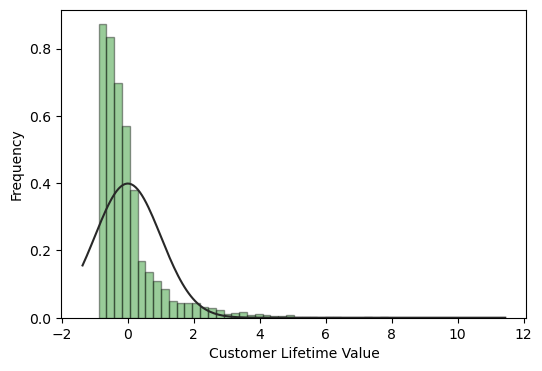

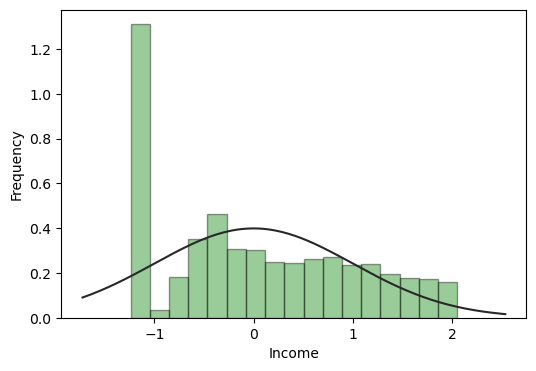

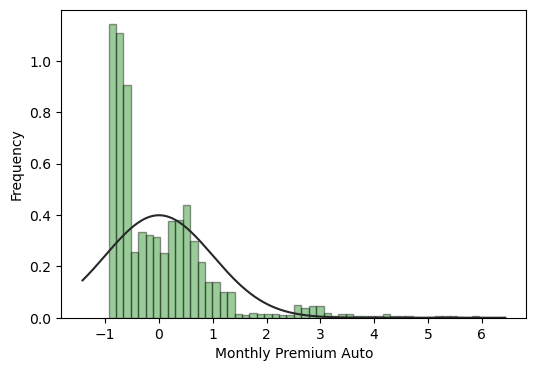

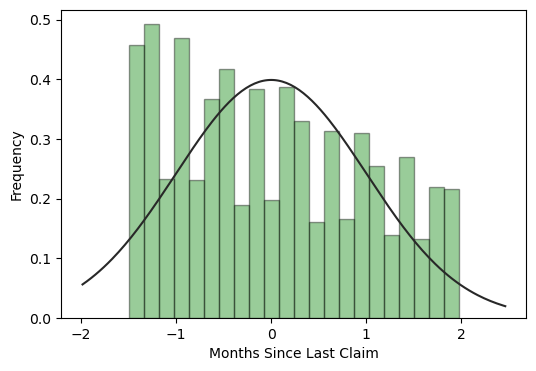

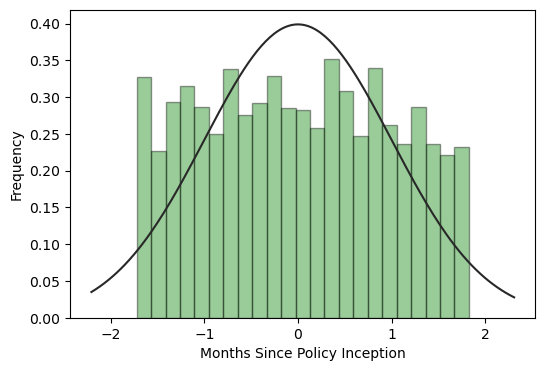

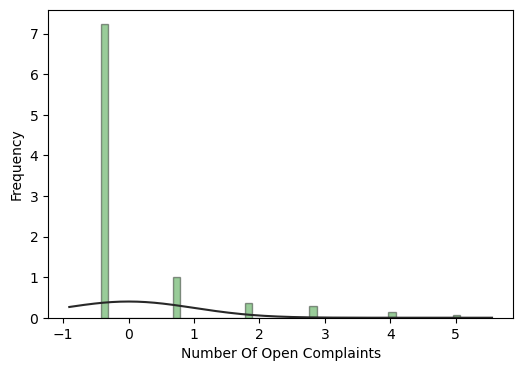

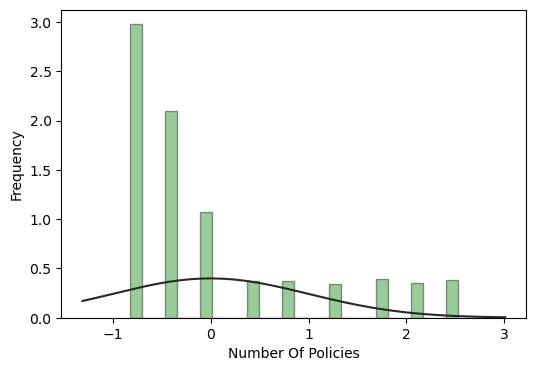

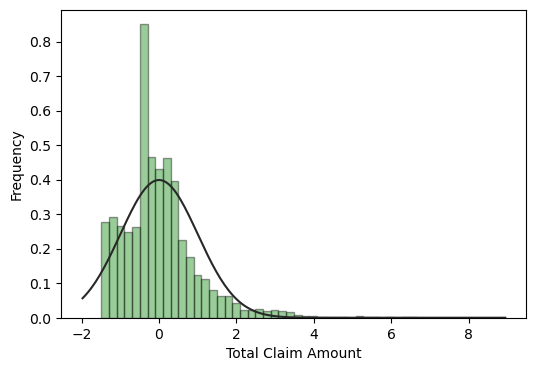

In [9]:
for column in standardized_nums:
    plt.figure(figsize = (6,4))
    sns.distplot(standardized_nums[column], fit=norm, color='green', hist_kws={'edgecolor': 'black'}, kde=False)

    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

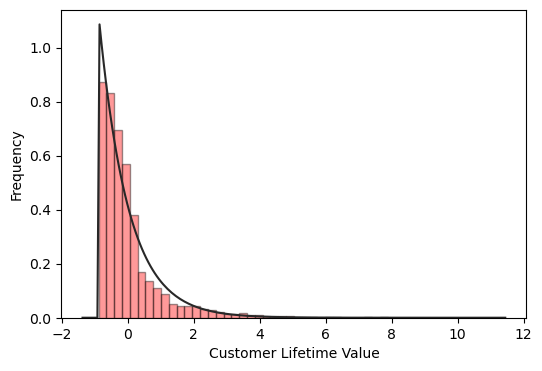

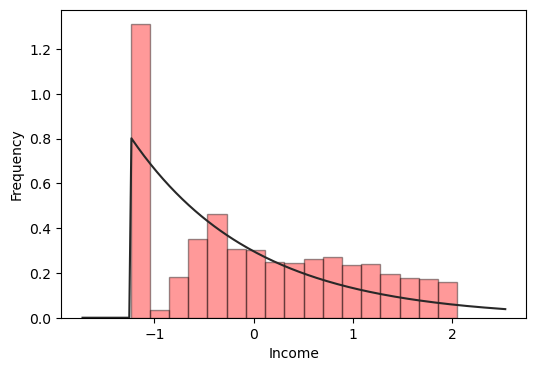

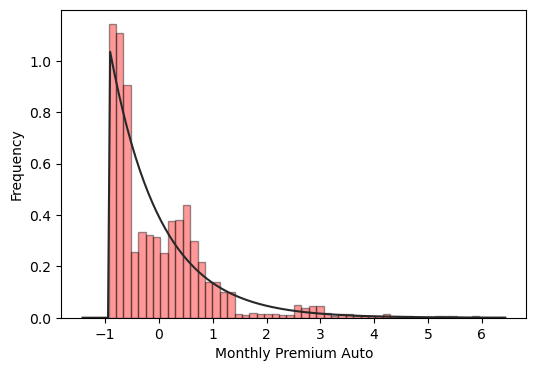

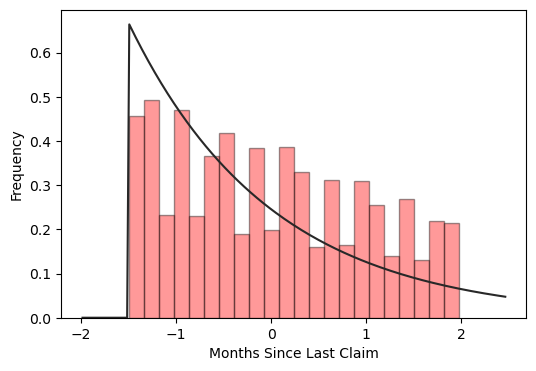

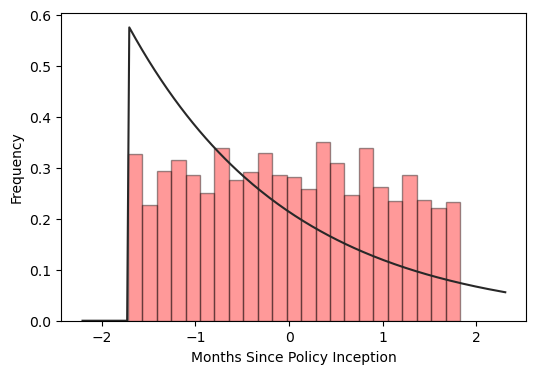

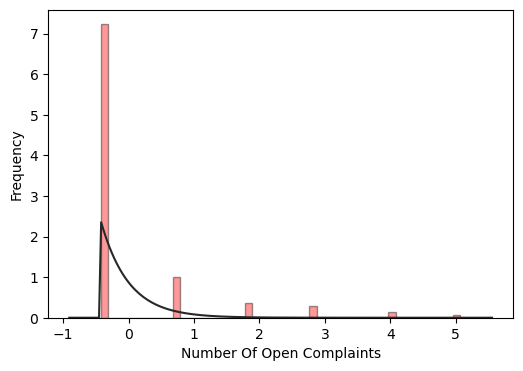

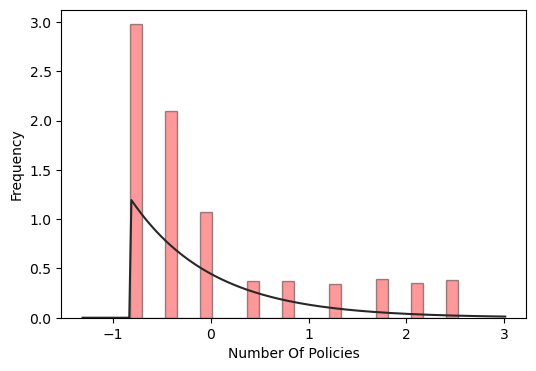

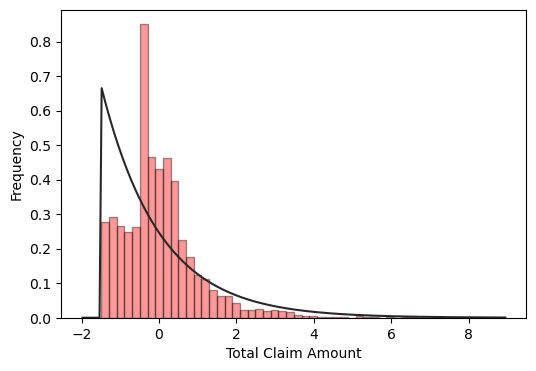

In [10]:
for column in standardized_nums:
    plt.figure(figsize = (6,4))
    sns.distplot(standardized_nums[column], fit=expon, color='red', hist_kws={'edgecolor': 'black'}, kde=False)

    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

Logically the StandardScaler does not change much for either fit, since it is scaling the data with the mean on 0 but rarely transforming it otherwise. The Normalizer showed extreme results in the last lab, let's see the effect here.

In [11]:
transformer = Normalizer().fit(nums)
transformed_nums = transformer.transform(nums)
normalized_cols = nums.columns.tolist()
normalized_nums = pd.DataFrame(transformed_nums, columns=normalized_cols)

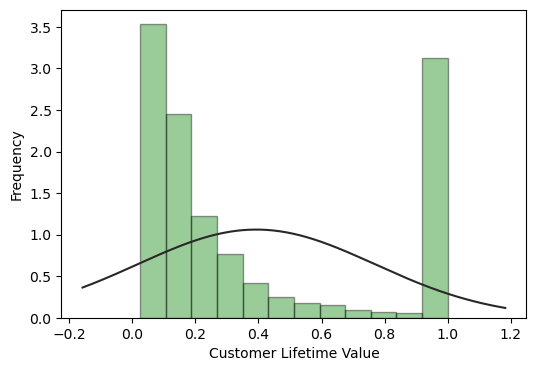

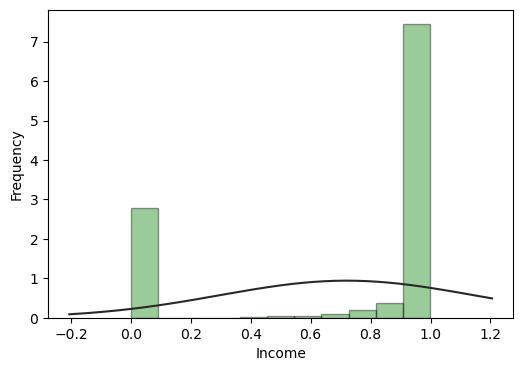

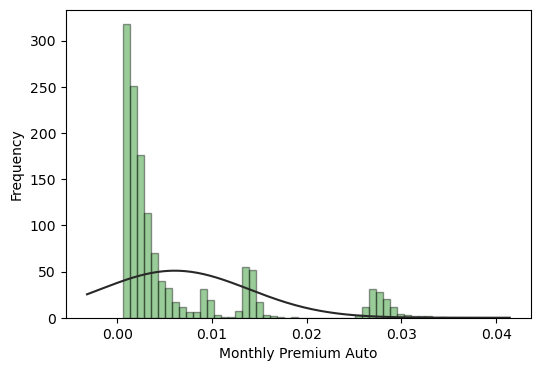

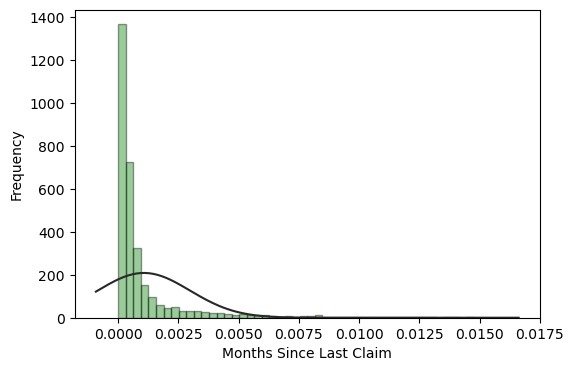

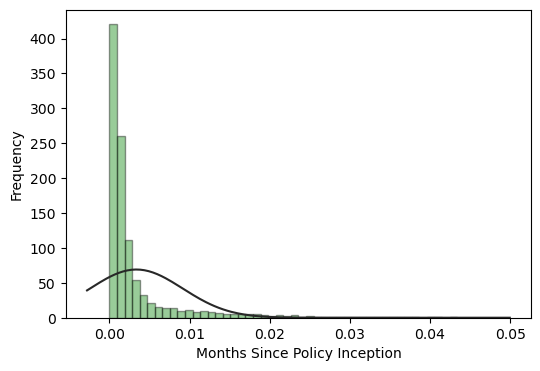

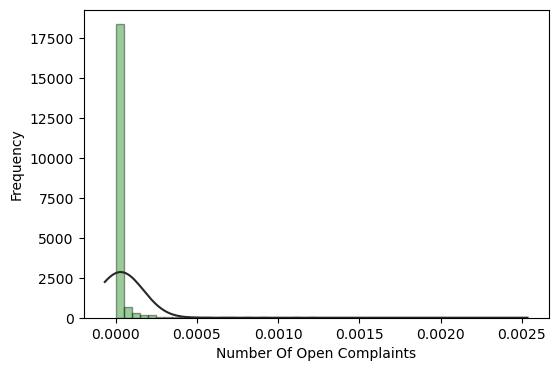

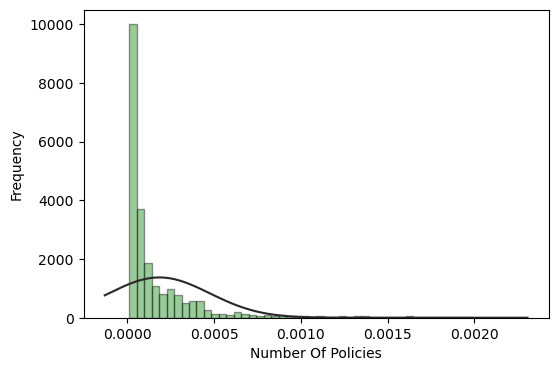

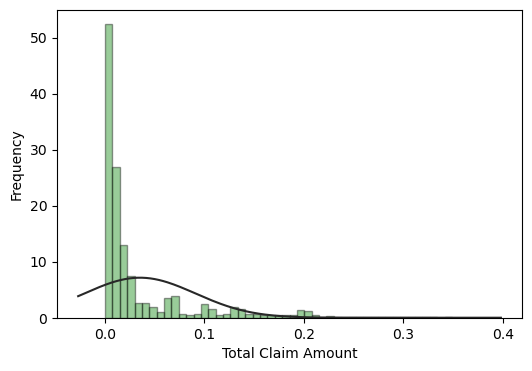

In [12]:
for column in normalized_nums:
    plt.figure(figsize = (6,4))
    sns.distplot(normalized_nums[column], fit=norm, color='green', hist_kws={'edgecolor': 'black'}, kde=False)

    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

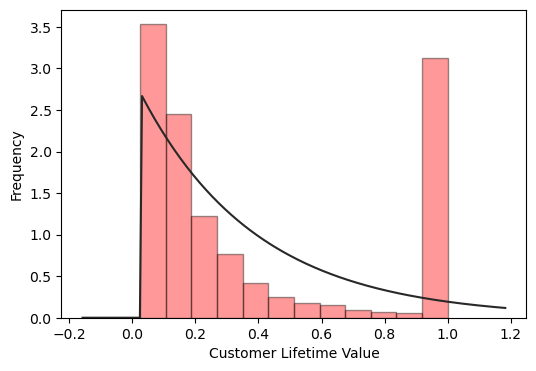

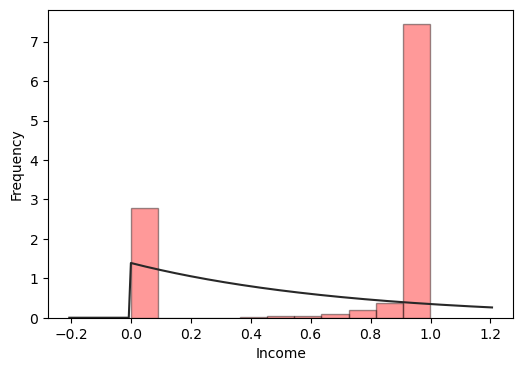

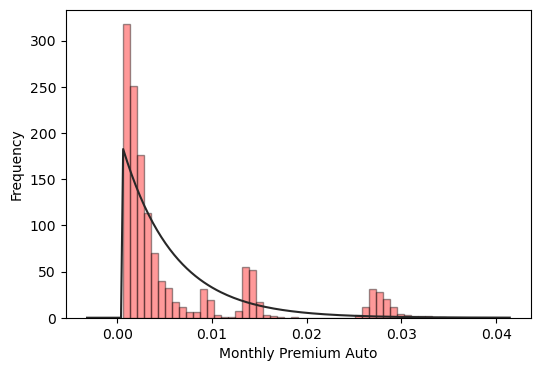

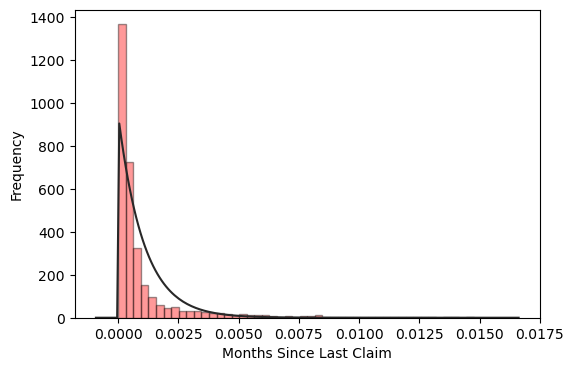

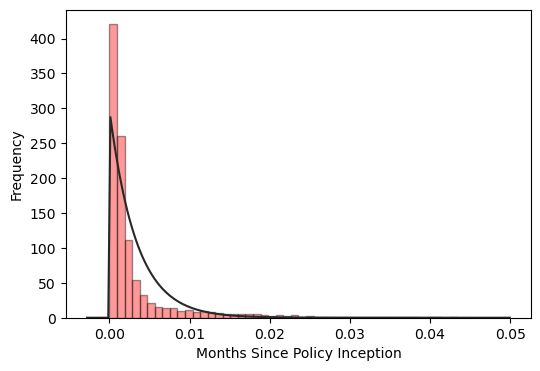

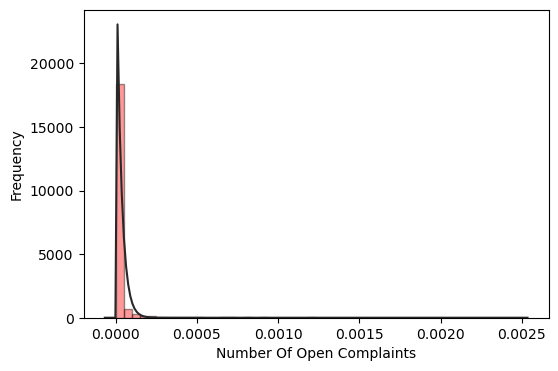

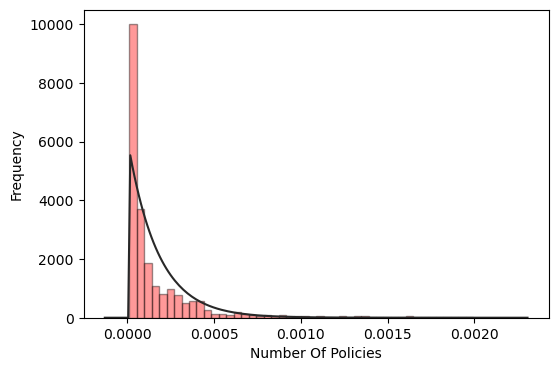

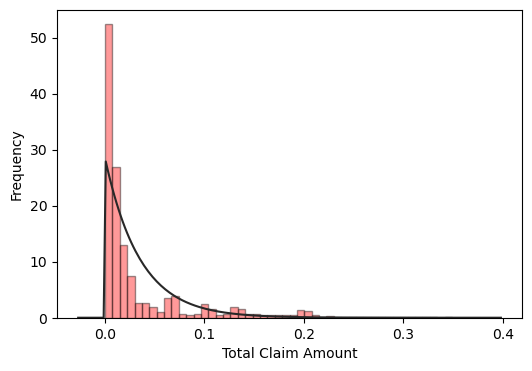

In [13]:
for column in normalized_nums:
    plt.figure(figsize = (6,4))
    sns.distplot(normalized_nums[column], fit=expon, color='red', hist_kws={'edgecolor': 'black'}, kde=False)

    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

The Normalizer improves the fit for the theoretical exponential distribution for about half of the variables meanwhile it worsens it for the other half. For the theoretical normal distribution it shows no positive effect. I would not use the Normalizer since it would pretty much turn the data "upside down". Next is the MinMaxScaler.

In [14]:
transformer = MinMaxScaler().fit(nums)
transformed_nums = transformer.transform(nums)
minmax_cols = nums.columns.tolist()
minmax_nums = pd.DataFrame(transformed_nums, columns=minmax_cols)

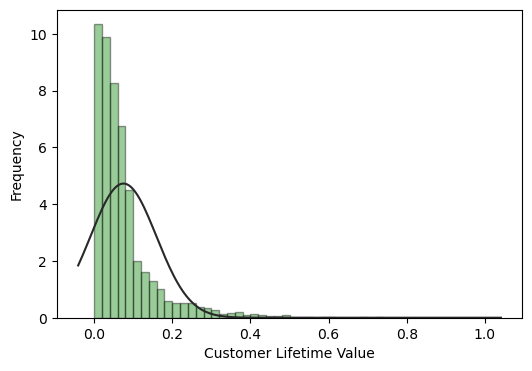

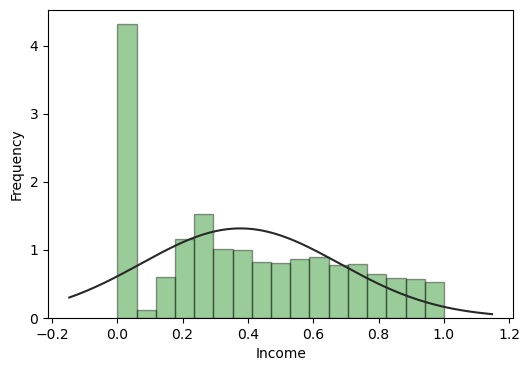

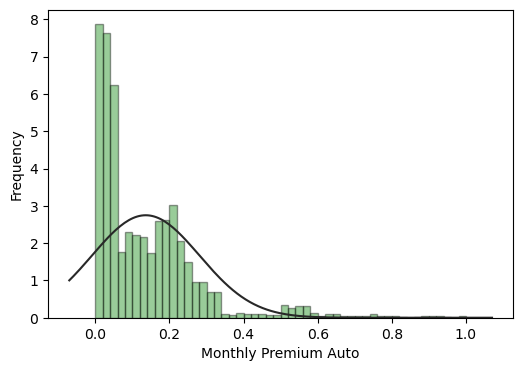

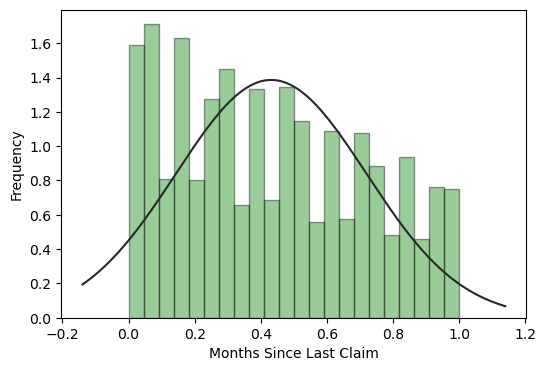

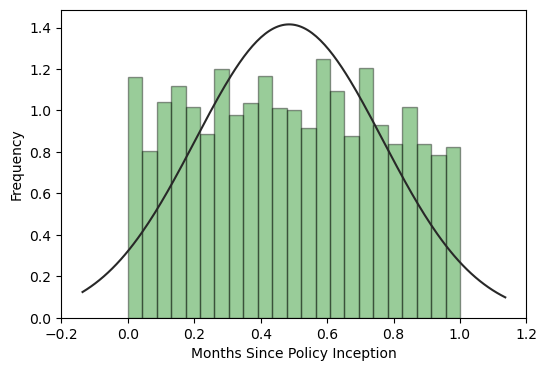

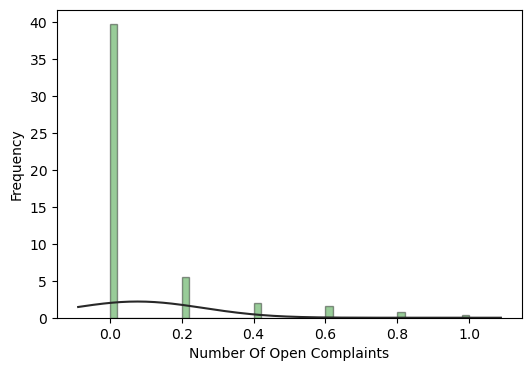

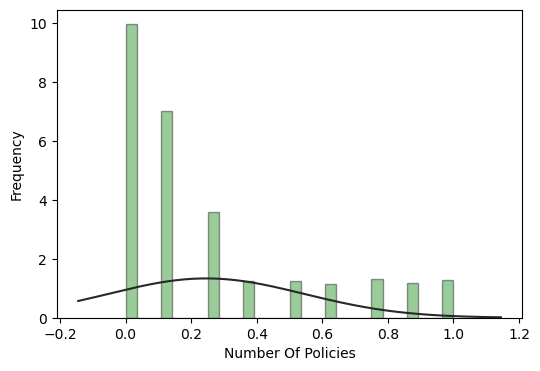

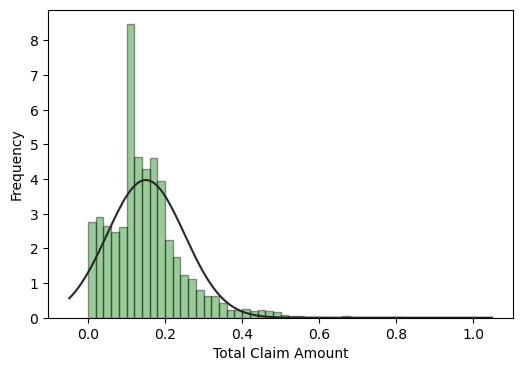

In [15]:
for column in minmax_nums:
    plt.figure(figsize = (6,4))
    sns.distplot(minmax_nums[column], fit=norm, color='green', hist_kws={'edgecolor': 'black'}, kde=False)

    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

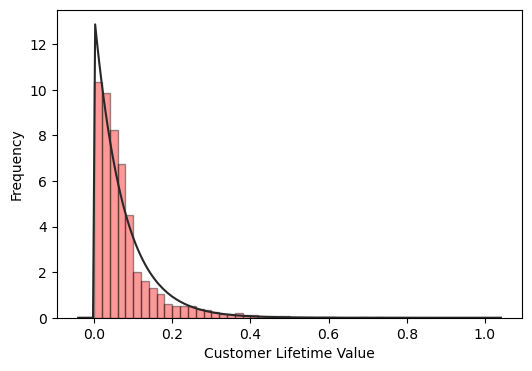

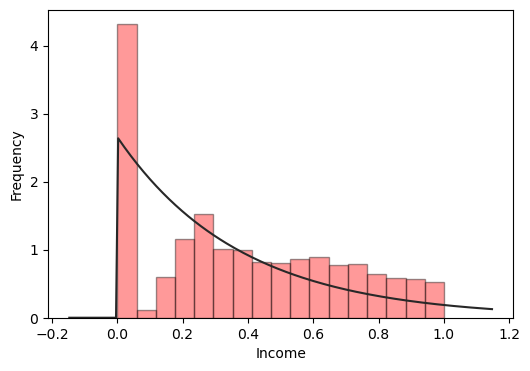

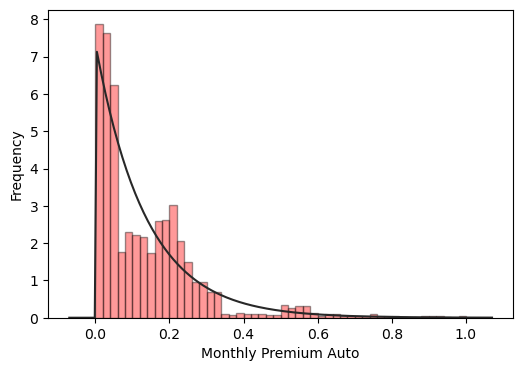

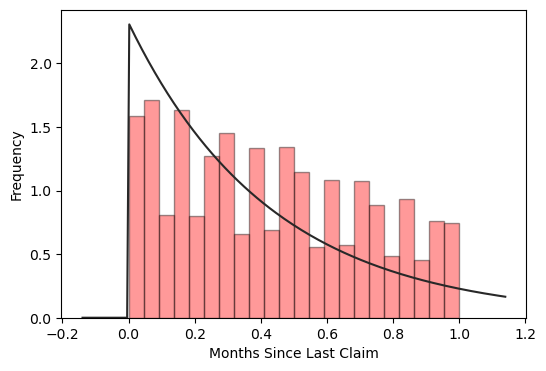

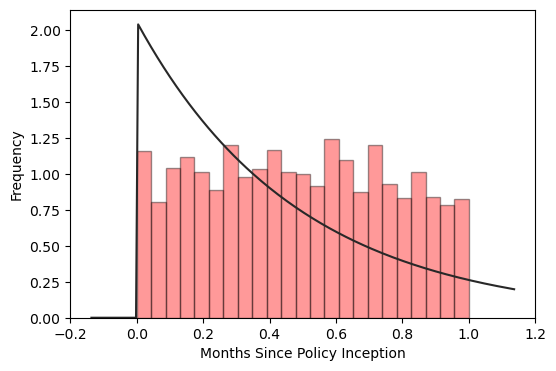

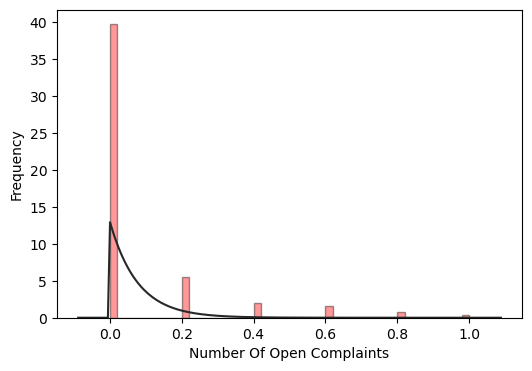

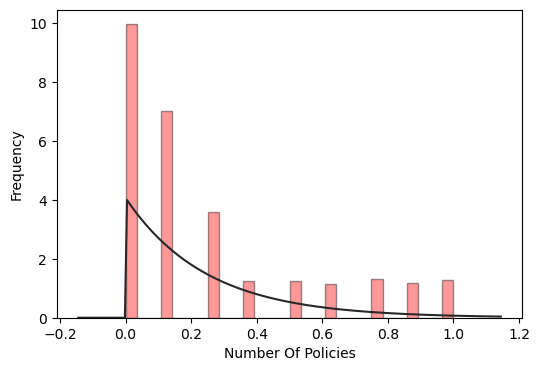

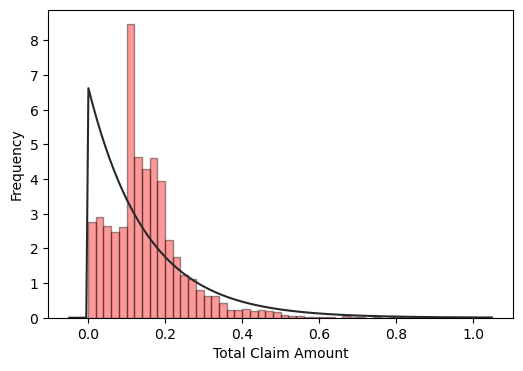

In [16]:
for column in minmax_nums:
    plt.figure(figsize = (6,4))
    sns.distplot(minmax_nums[column], fit=expon, color='red', hist_kws={'edgecolor': 'black'}, kde=False)

    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

The MinMaxScaler produces no change in comparison to not applying a scaler at all on neither of the two fits. I would discard it just like the Normalizer. Now, i will try a log transformation.

In [17]:
log_nums = np.log(nums)

In [18]:
log_nums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   float64
 2   monthly_premium_auto           9134 non-null   float64
 3   months_since_last_claim        9134 non-null   float64
 4   months_since_policy_inception  9134 non-null   float64
 5   number_of_open_complaints      9134 non-null   float64
 6   number_of_policies             9134 non-null   float64
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(8)
memory usage: 642.2+ KB


All values are now floats, and some have become too large to handle, therefore I have to replace them with 0. I would have preferred to round the infinte values to two decimals, but could not find the way to do so.

In [19]:
log_nums = log_nums.replace([np.inf, -np.inf], np.nan).fillna(0).astype(float)

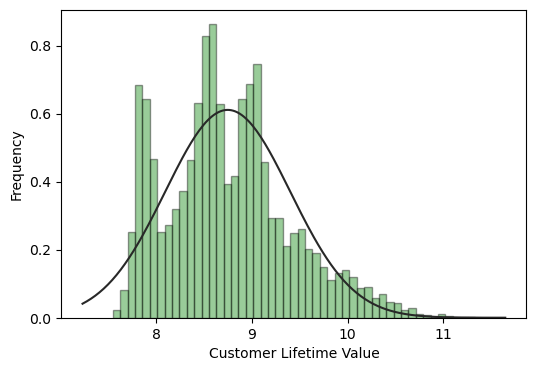

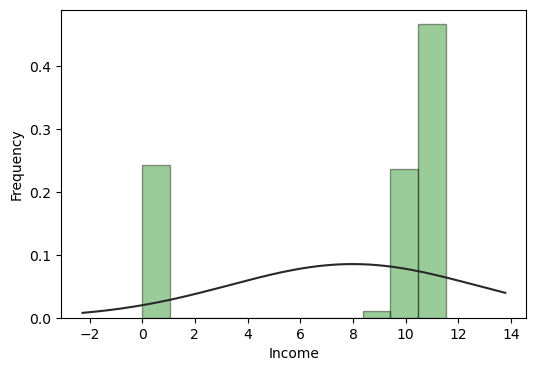

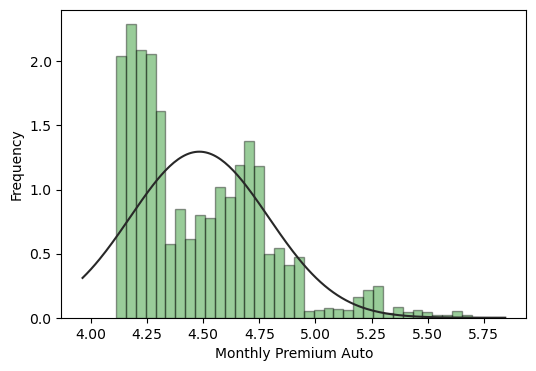

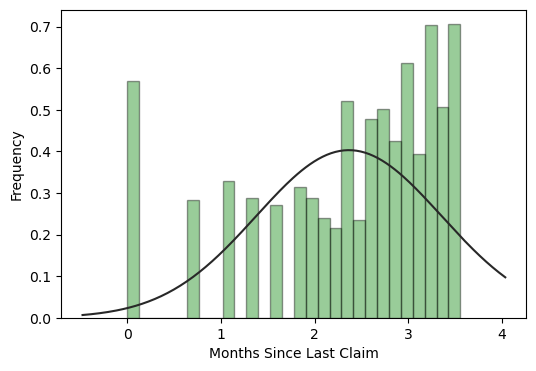

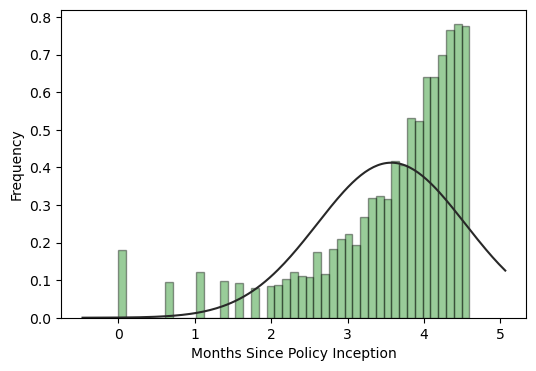

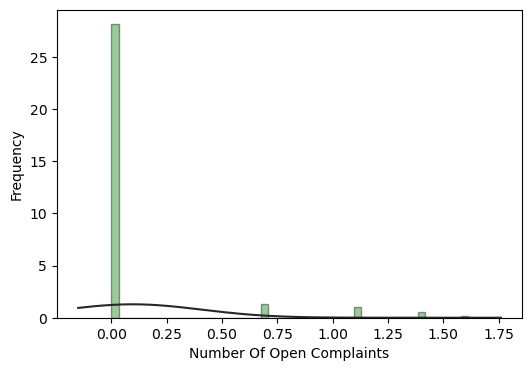

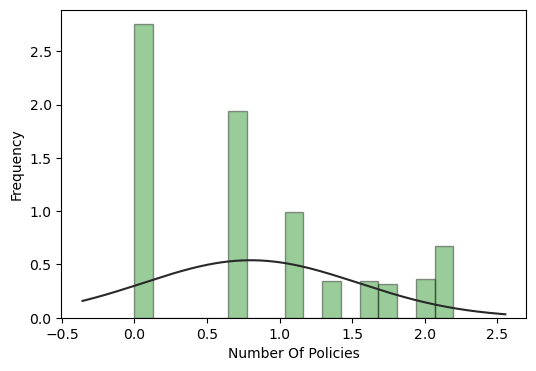

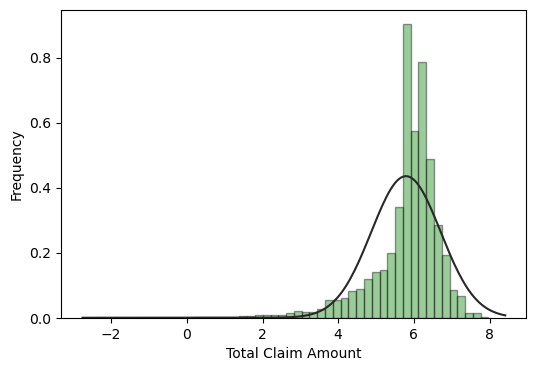

In [20]:
for column in log_nums:
    plt.figure(figsize = (6,4))
    sns.distplot(log_nums[column], fit=norm, color='green', hist_kws={'edgecolor': 'black'}, kde=False)

    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

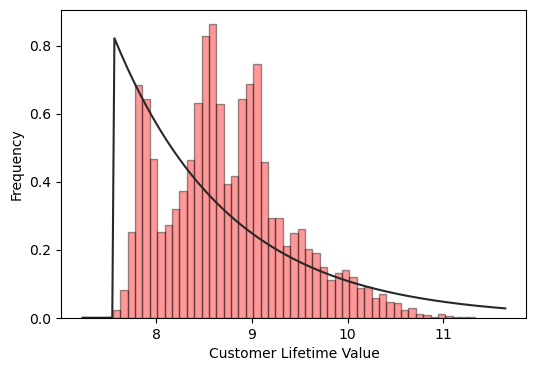

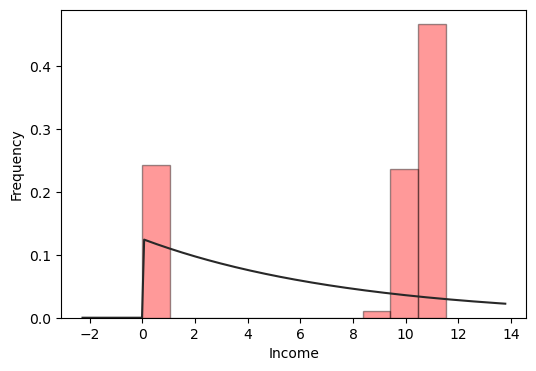

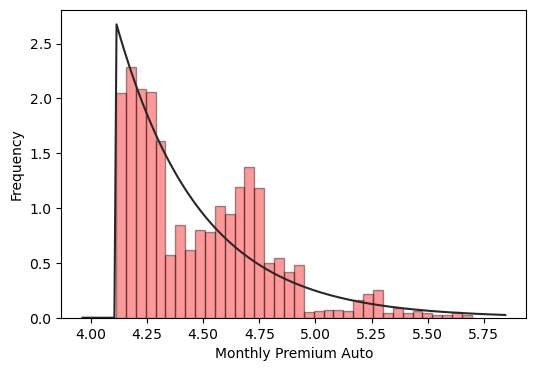

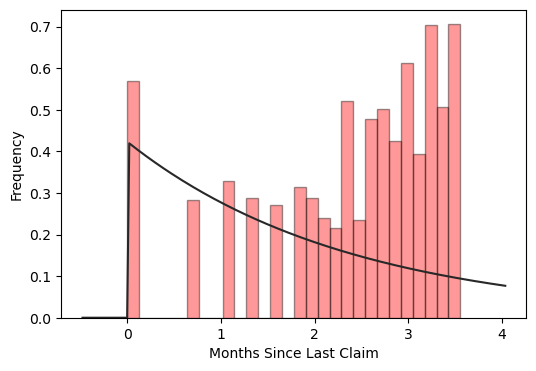

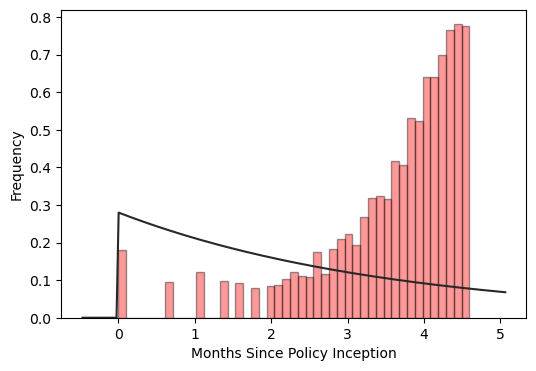

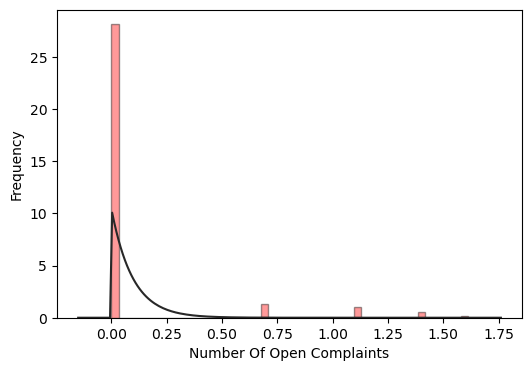

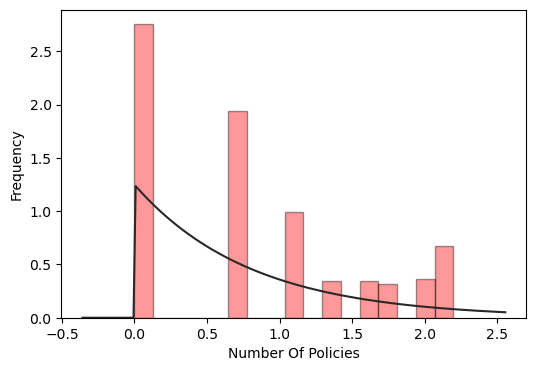

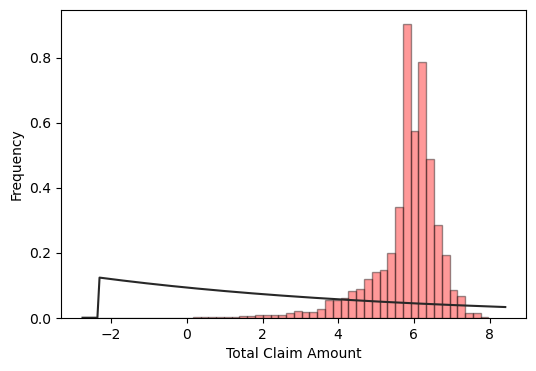

In [21]:
for column in log_nums:
    plt.figure(figsize = (6,4))
    sns.distplot(log_nums[column], fit=expon, color='red', hist_kws={'edgecolor': 'black'}, kde=False)

    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

With the log transformation the values basically shifted to the other side and is now skewed towards the right instead of the left. There is no significant improvement, still the dataset without any transformation applied looks best. Lastly, I will try the Box-Cox transformation.

In [24]:
boxcox_nums = pd.DataFrame()
_ci = {}

for column in nums.columns:
        nums[column] = np.where(nums[column]<=0, np.NAN, nums[column]) 
        nums[column] = nums[column].fillna(nums[column].mean())
        transformed_data, ci = stats.boxcox(nums[column])
        boxcox_nums[column] = transformed_data
        _ci[column] = [ci]

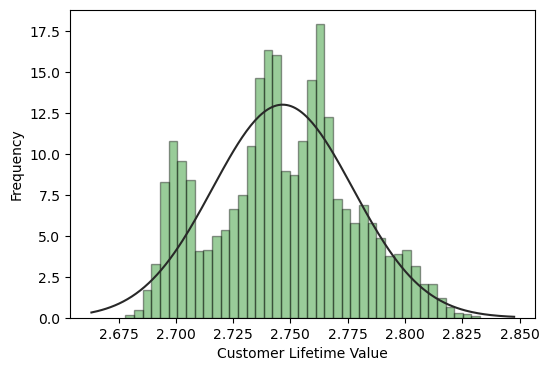

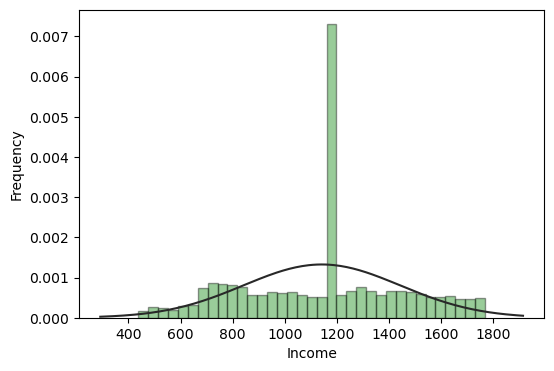

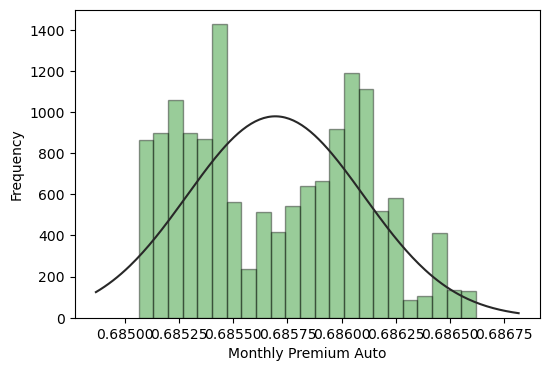

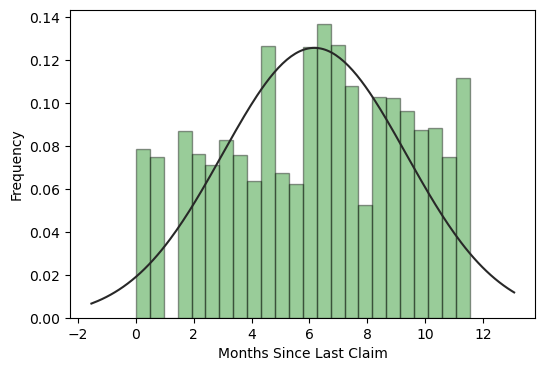

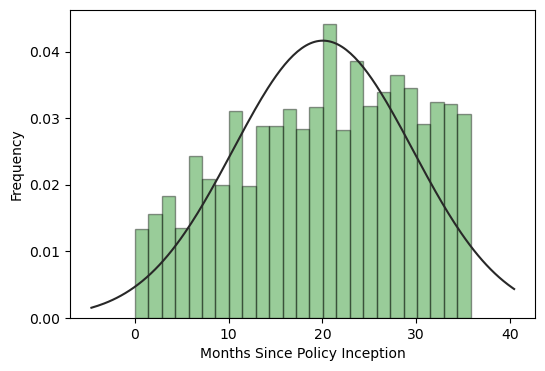

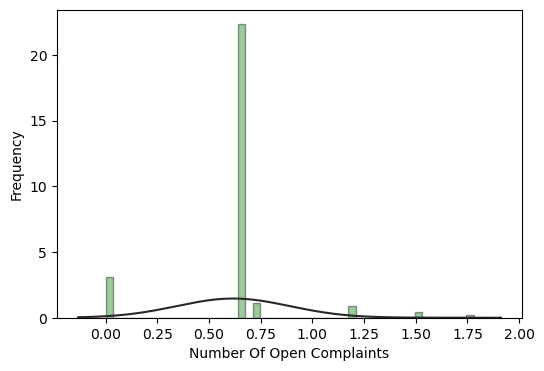

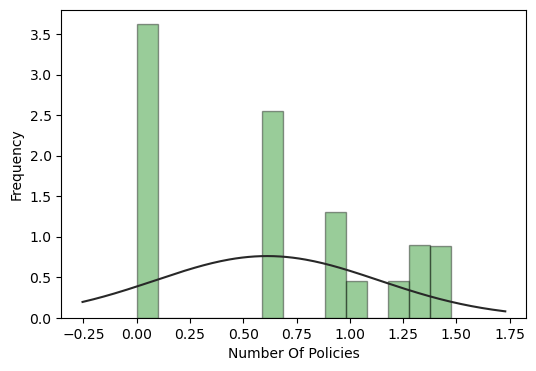

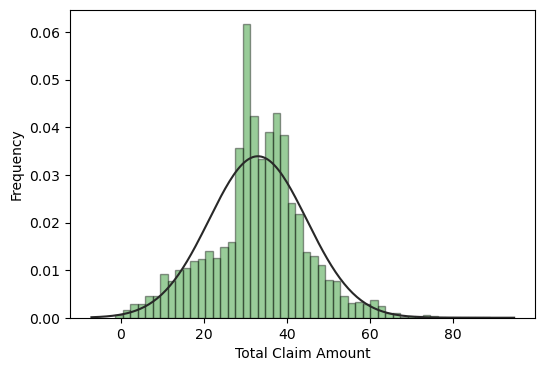

In [25]:
for column in boxcox_nums:
    plt.figure(figsize = (6,4))
    sns.distplot(boxcox_nums[column], fit=norm, color='green', hist_kws={'edgecolor': 'black'}, kde=False)

    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

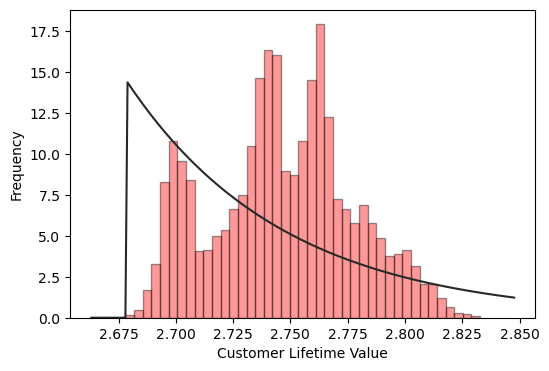

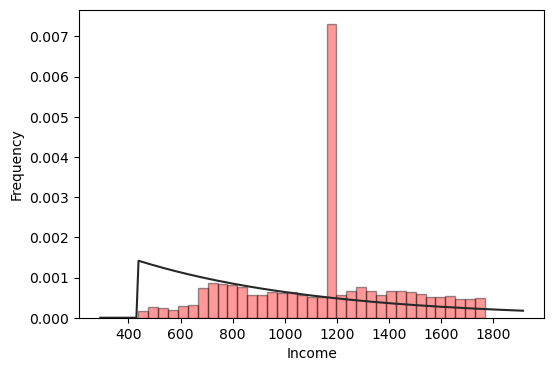

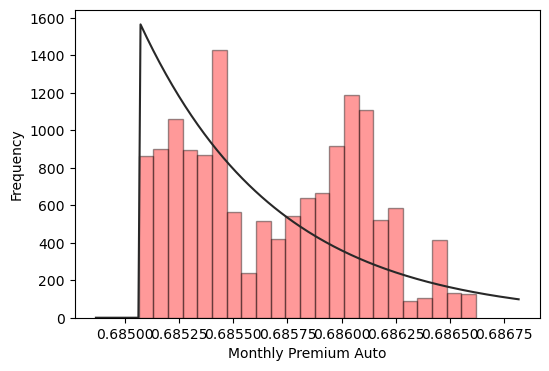

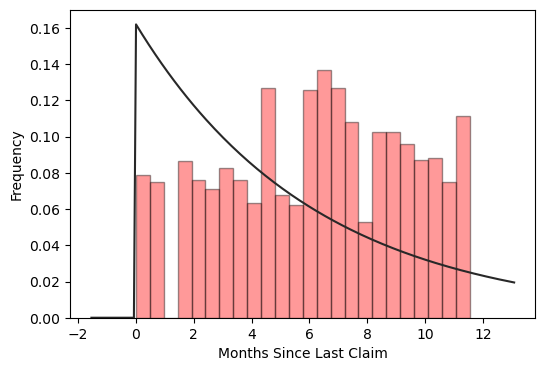

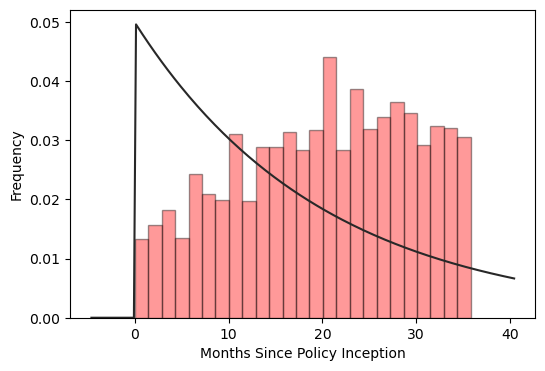

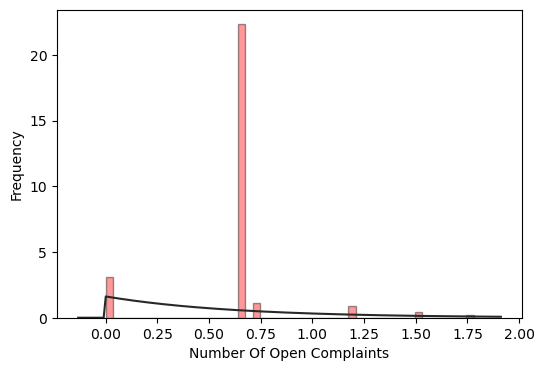

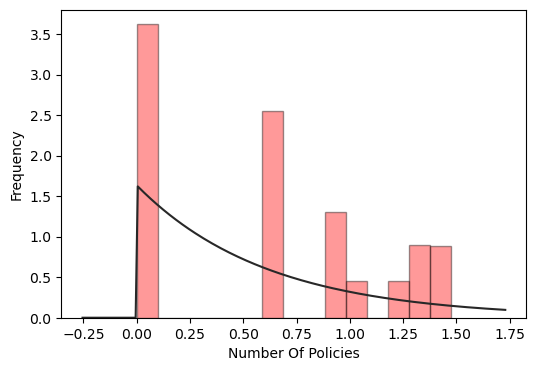

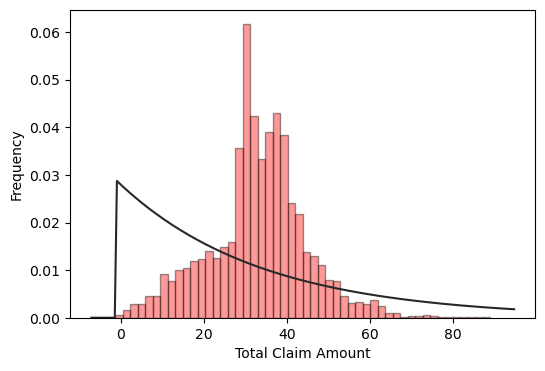

In [26]:
for column in boxcox_nums:
    plt.figure(figsize = (6,4))
    sns.distplot(boxcox_nums[column], fit=expon, color='red', hist_kws={'edgecolor': 'black'}, kde=False)

    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

Finally, with the Box-Cox transformation the values have taken a much better fit to the theoretical normal distribution. The theoretical exponential distribution is still achieved best with th dataset without any transformation.